In [1]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 1.7 MB 50.1 MB/s 
     |████████████████████████████████| 439 kB 68.0 MB/s 
     |████████████████████████████████| 6.0 MB 43.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.11.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#data preprocessing

In [7]:
from tensorflow.keras.datasets import fashion_mnist

In [8]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data() #loading dataset

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
#above represents 60,000 images in the dataset and size
#of each image is 28 by 28.

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
#above represents 10,000 images in test dataset and dimension of each image
#is 28X28.

In [13]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [14]:
#train and test data have 60000 and 10000 rows.

In [15]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
np.max(x_train)

255

In [17]:
np.min(x_train)

0

In [18]:
np.mean(x_train)

72.94035223214286

In [19]:
np.max(y_train),np.min(y_train),np.mean(y_train)

(9, 0, 4.5)

In [20]:
#np.max(y_train) gives answer as 9 as there are 10 classes from 0 to 9.

In [21]:
class_names=['0 Top/T-shirt','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sandal','6 Shirt','7 Sneaker','8 Bag','9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [22]:
#Data Exploration

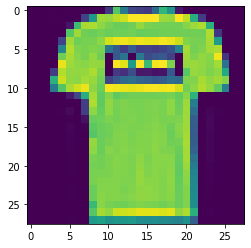

In [23]:
plt.figure()
plt.imshow(x_train[1])

In [24]:
y_train[1]

0

In [25]:
#y_train is result and gives value 0 which by class_names list is
#top/t-shirt.

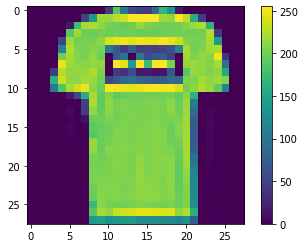

In [26]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [27]:
#normalizing the dataset as after normalization ml model
#runs faster.

In [28]:
x_train=x_train/255.0
x_test=x_test/255.0
#dividing by there are 256 values from 0 to 255.

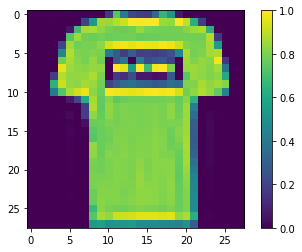

In [29]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [30]:
#colorbar ranging from 0 to 1 means we have successfully normalized the dataset.

In [31]:
#Flattening the dataset means we convert 60000 2d arrays into 60000 1d arrays.

In [32]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [33]:
#60000 train values of 28 X 28 and 10000 test values of 28 X 28.

In [34]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)
#converting 2d to 1d.

In [35]:
#new values after reshaping.
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [36]:
#above we converted 2d array into 1d vector.

In [37]:
#units=128,  activation='relu',  input_shape=(784,))
'''
units=128
The artificial neuron receives one or more inputs and sums them to produce an 
output, then this output is passed throught the activation function.
i have selected number on neurons=128 because it works better, and this is 
on the basis of various experiments.
activation='relu'
The activation function calculates the weighted sum of its input, adds a bias 
and then decides whether a neuron should be activated or not.
An activation function decides a signal should be passed forward or not.
The activation function adds non linearity to the output of a neuron
With the non linear transformation a neural network is capable of learning and 
performing more complex tasks.
We are using 'relu' function in first layer because,
It is Non-linear, easily backpropagates the errors and multiple layers of 
neuron being activated by ReLU function
As well as, it is computationally less expensive than tanh and sigmoid 
functions, RELU learns much faster than sigmoid and Tanh function
input_shape=(784,)
Earlier we flattened the dataset, before flattening the dataset shape for 
x_train is (60000, 28, 28) and shape for x_text is (10000, 28, 28)
60000 and 10000 are the number of images (batch size)
After flattening the dataset shape for x_train is (60000, 784) and shape 
for x_text is (10000, 784)
60000 and 10000 are the number of images (batch size)
The first dimension is the batch size, it's None because it can vary 
depending on how many examples we give for training
hence input shape is (784,)
'''

"\nunits=128\nThe artificial neuron receives one or more inputs and sums them to produce an \noutput, then this output is passed throught the activation function.\ni have selected number on neurons=128 because it works better, and this is \non the basis of various experiments.\nactivation='relu'\nThe activation function calculates the weighted sum of its input, adds a bias \nand then decides whether a neuron should be activated or not.\nAn activation function decides a signal should be passed forward or not.\nThe activation function adds non linearity to the output of a neuron\nWith the non linear transformation a neural network is capable of learning and \nperforming more complex tasks.\nWe are using 'relu' function in first layer because,\nIt is Non-linear, easily backpropagates the errors and multiple layers of \nneuron being activated by ReLU function\nAs well as, it is computationally less expensive than tanh and sigmoid \nfunctions, RELU learns much faster than sigmoid and Tanh f

In [38]:
#Building the model.
model = tf.keras.models.Sequential()
#sequential class is used  as we are creating fully connected neural network,
#which is a series of dense layers or simply sequence of layers.

In [39]:
#adding 1st fully connected hidden layer.
#1)units or no. of neurons = 128.
#2)activation function = ReLU
#3)input shape = 784
#we added 3) point as we have flattened the dataset, so our neural network 
#will get pixels of images in form of a single vector.
#above 3 parameters we have to add in 1st fully connected hidden layer.
#to add 1st fully connected layer in our model we use .add() method 
model.add(tf.keras.layers.Dense(units=128,activation='ReLU',input_shape=(784,)))
#above line for adding 1st fully connected hidden layer.

In [40]:
#adding the 2nd layer with dropout
#dropout is a regularization technique inwhich randomly selected neurons are
#ignored during the training process and these ignored neurons are not considered
#during forward/backward propagation.
#we need to add dropout layer to prevent overfitting.
#the dropout layer will prevent our ml model from learning too much in training
#process.
model.add(tf.keras.layers.Dropout(0.3)) #the 0.3 is % of dropout neurons.

In [41]:
#adding output layer
#1) units=10
#no of units =10 as there are 10 classes in the output.
#2)activation = softmax
#for multiple outputs we use activation function=softmax.
#for binary output we use sigmoid activation function.
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [42]:
#TRAINING THE MODEL.

In [44]:
#BEFORE TRAINING THE MODEL WE HAVE TO CONFIGURE THE MODEL AND THIS IS CALLED 
#COMPILING THE MODEL.
#WE HAVE TO ADD THE 3 ARGUEMENTS OR PARAMETERS:
#1)OPTIMIZER=adam :-- MINIMIZE THE LOSS FUNCTION.
#2)LOSS FUNCTION=sparse_categorical_crossentropy :-- acts as guide to optimizer.
#3)METRICS= sparse_categorical_accuracy :- for multiple outputs
#for binary output we use MATRICES= accuracy
#here we have multiple outputs so we have MATRICES= sparse_categorical_accuracy
#compiling the model now
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [46]:
#From output shape we get no. of neurons = 128 for dense(Dense) and parameters=100480
#similarly for dropout we have output shape or no of neurons =128 and parameters=0.
#and for dense output shape/no. of neurons =10 and parameters=1290.

In [47]:
#after compiling the model we have to train the model.
model.fit(x_train,y_train,epochs=10)
#epochs mean no. of times we are going to train our model.
#so we are training our ml model 10 times.

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5534 - sparse_categorical_accuracy: 0.8034
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4210 - sparse_categorical_accuracy: 0.8471
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3878 - sparse_categorical_accuracy: 0.8572
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3684 - sparse_categorical_accuracy: 0.8678
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3525 - sparse_categorical_accuracy: 0.8710
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3406 - sparse_categorical_accuracy: 0.8747
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3320 - sparse_categorical_accuracy: 0.8762
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3250 - sparse_categorical_accuracy: 0.8792
Epoch 9/10
1875/1875 [====

In [48]:
#above we see accuracy is increasing and loss is decreasing.
#above accuracy and loss is on training data.

In [49]:
#Model evaluation
test_loss,test_accuracy=model.evaluate(x_test,y_test)
#model makes predictions based on x_test and then compare with y_test

313/313 [==============================] - 1s 2ms/step - loss: 0.3399 - sparse_categorical_accuracy: 0.8766


In [50]:
print('TEST ACCURACY: {}'.format(test_accuracy))

TEST ACCURACY: 0.8766000270843506


In [51]:
#WE FIND NOT MUCH DIFFERENCE BETWEEEN TEST AND TRAINING ACCURACY SO OUR MODEL
#IS WORKING FINE.(NO OVERFITTING)

In [52]:
#Model Prediction

In [54]:
#y_pred=model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
#we are doing predictions for x_test.

313/313 [==============================] - 1s 3ms/step


In [55]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [56]:
y_pred[0]

9

In [57]:
#above made prediction that index 0 contains object belonging to class 10.

In [58]:
#checking predicted output is correct or not.
y_test[0]  #actual output

9

In [59]:
#so our predicted output is correct.

In [60]:
y_pred[110],y_test[110]  #predicted and actual output

(2, 2)

In [61]:
#predicted and actual outputs match.

In [62]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [63]:
# for 2: class name is PullOver.

In [64]:
#confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred) 
#confusion matrix contains matrix of actual and predicted values.
print(cm)

[[816   0  15  32   4   1 123   0   9   0]
 [  2 963   1  26   4   0   1   0   3   0]
 [ 12   0 764  13 146   0  59   0   6   0]
 [ 20   4   7 903  33   0  29   0   4   0]
 [  0   1  76  30 845   0  40   0   8   0]
 [  0   0   0   0   0 966   0  18   1  15]
 [118   0  97  34  95   0 638   0  18   0]
 [  0   0   0   0   0  23   0 923   0  54]
 [  2   0   4   5   3   2   4   4 976   0]
 [  0   0   0   0   0   8   1  19   0 972]]


In [66]:
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)

0.8766


In [67]:
#above we calculated accuracy score based on confusion matrix.

In [68]:
#steps followed are->
#1)installing and setup i.e. installing packages etc.
#2)data preprocessing
#3)building the model
#4)training the model
#5)model evaluation and prediction